## Decision Tree & KNN

**Decision Tree**

Pros: Interpretability, Non-parametric, Non-linear, Feature Importance, Handles Mixed Data  
Cons: Overfitting, Instability, Bias (Imbalanced Data), High Dimensionality



**K-Nearest Neighbors (KNN)**

Pros: Simple, Versatile, Non-parametric  
Cons: Computationally Expensive, Sensitive to Irrelevant Features, K Selection, Memory Intensive, Curse of Dimensionality

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier


In [2]:
# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Labels

# Display the first 5 rows of the dataset
df = pd.DataFrame(X, columns=iris.feature_names)
df['Species'] = y
print("First 5 rows of the Iris dataset:")
print(df.head())

First 5 rows of the Iris dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Species  
0        0  
1        0  
2        0  
3        0  
4        0  


In [3]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[:, :2], y, test_size=0.3, random_state=42)


In [4]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100,
                    label='Test set')

## Decision Tree

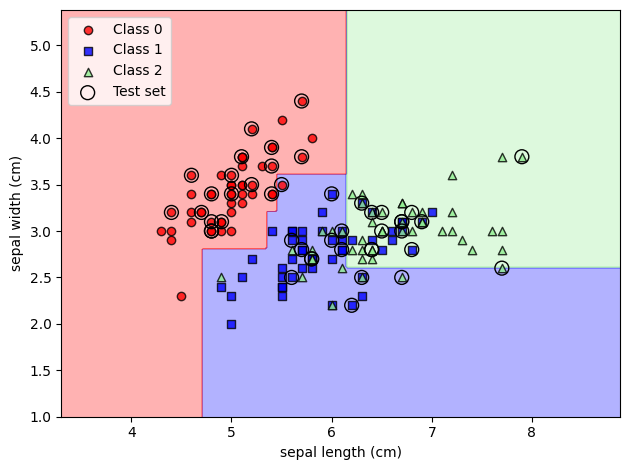

In [5]:
tree_model = DecisionTreeClassifier(criterion='gini', # criterion{“gini”, “entropy”}, default=”gini”
                                    max_depth=4, # default=None
                                    random_state=42)


tree_model.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined,
                      classifier=tree_model,
                      test_idx=range(105, 150))

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

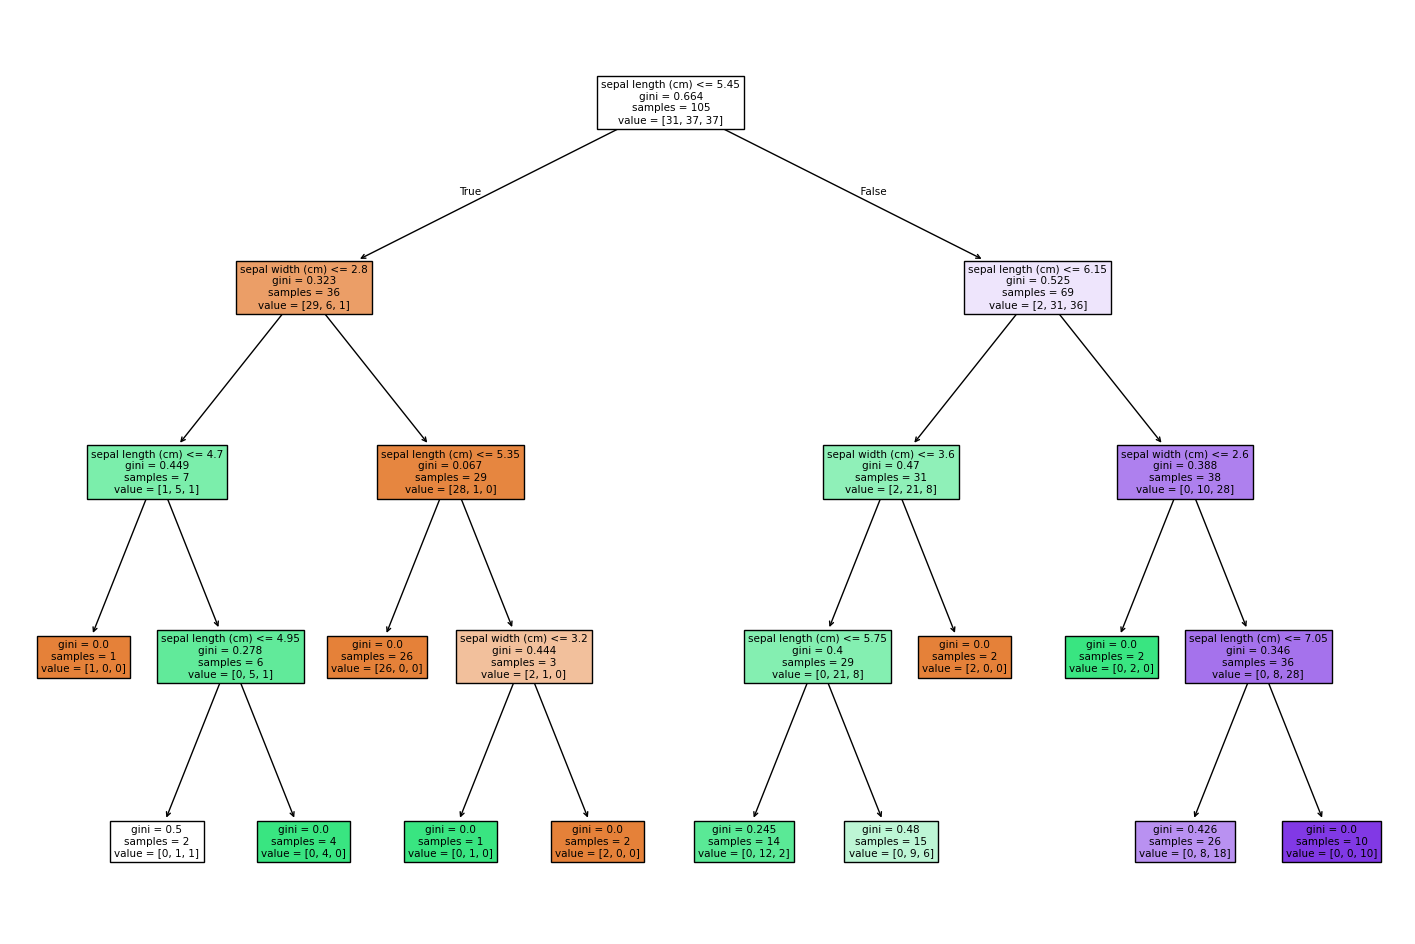

In [6]:
from sklearn import tree

# Create the figure and axes with a larger size
fig, ax = plt.subplots(figsize=(18, 12))

tree.plot_tree(tree_model,
               feature_names=iris.feature_names[0:2],
               filled=True)
plt.show()


In [7]:
# Evaluate with Classification Report
y_pred = tree_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.7555555555555555
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.57      0.62      0.59        13
           2       0.62      0.62      0.62        13

    accuracy                           0.76        45
   macro avg       0.73      0.73      0.73        45
weighted avg       0.77      0.76      0.76        45



## K Nearest Neighbor

### Example of KNN classifier


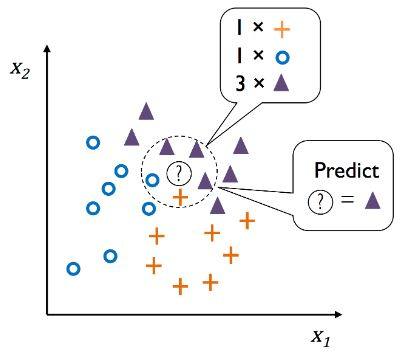

In [8]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[:, :2], y, test_size=0.3, random_state=42)

# Standardize the features (important for knn)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

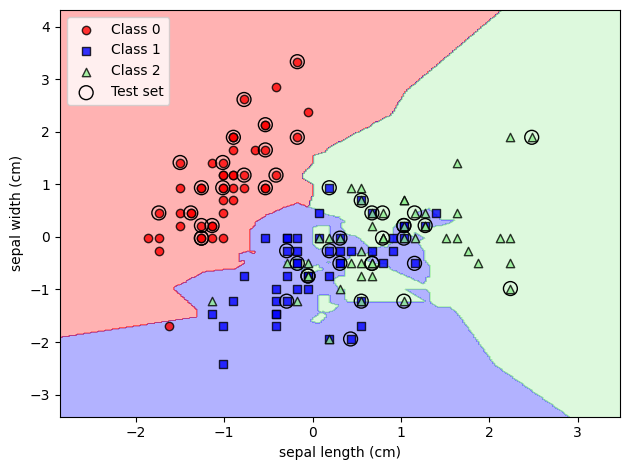

In [9]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3,
                           p=2,
                           metric='minkowski') # Default is “minkowski”, which results in the standard Euclidean distance when p = 2
knn.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined, y_combined,
                      classifier=knn, test_idx=range(105, 150))

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [10]:
# Evaluate with Classification Report
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.8444444444444444
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.80      0.62      0.70        13
           2       0.69      0.85      0.76        13

    accuracy                           0.84        45
   macro avg       0.83      0.82      0.82        45
weighted avg       0.85      0.84      0.84        45



### Example of KNN Regressor

In [11]:
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib.colors import ListedColormap

# Generate a random regression dataset with 2 features
X, y = make_regression(n_samples=200, n_features=2, noise=0.5, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [12]:
# Create and train the KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=3)
knn_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared Score: {r2:.4f}")

Mean Squared Error: 132.0976
R-squared Score: 0.9458


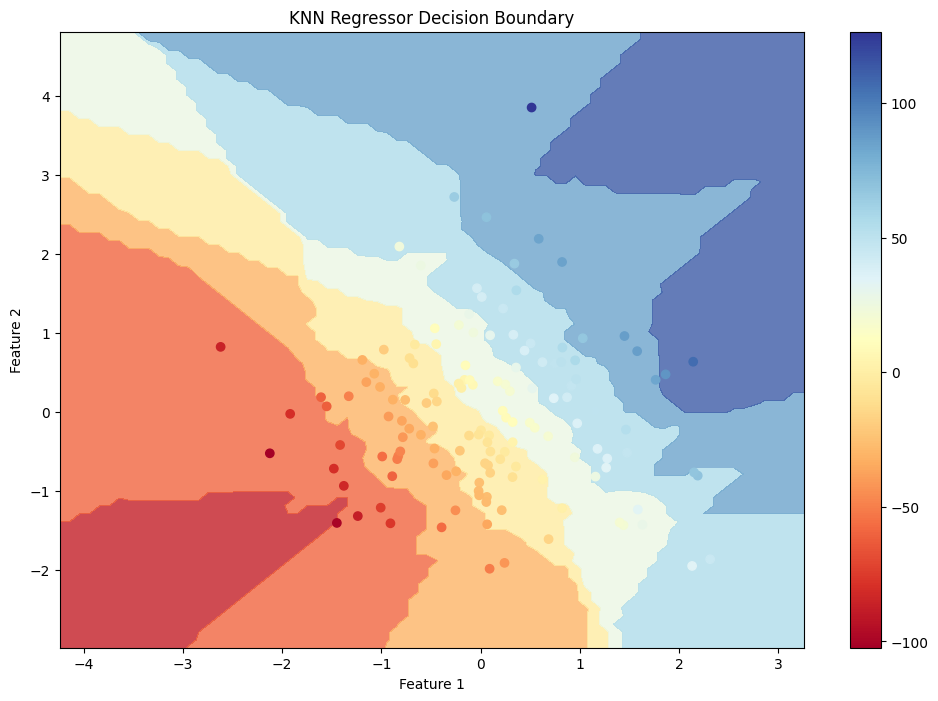

In [13]:
# Plot the results
plt.figure(figsize=(12, 8))

# Create a mesh grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict for each point in the mesh
Z = knn_regressor.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)

# Plot the training points
scatter = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdYlBu)
plt.colorbar(scatter)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KNN Regressor Decision Boundary')
plt.show()

## Homework

Hands-on practice on DT and KNN by using sklearn APIs. The notebook should include data preprocessing, model training, evaluation and visualization. **Submit your notebook in PDF format to BS by the due date.**  

You may choose your dataset or use any below:

Iris
https://bit.ly/3VqeyM8

Penguins
https://bit.ly/3wXu4pE


Diabetes
https://bit.ly/data-pi-diabetes



In [26]:
penguins=pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/refs/heads/master/penguins.csv')
penguins.shape

(344, 7)

In [27]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [ ]:
penguins.dropna(inplace=True)

# Encode categorical variables
penguins['species'] = penguins['species'].astype('category').cat.codes
penguins['island'] = penguins['island'].astype('category').cat.codes
penguins['sex'] = penguins['sex'].astype('category').cat.codes

# Define features and target variable
X = penguins.drop('species', axis=1)
y = penguins['species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)#using seed state for reproducibility
#assumign all features will be relevant for our DT/KNN

In [29]:
penguins.dtypes

species                 int8
island                  int8
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                     int8
dtype: object

In [30]:
#scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#decision tree stuff
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)

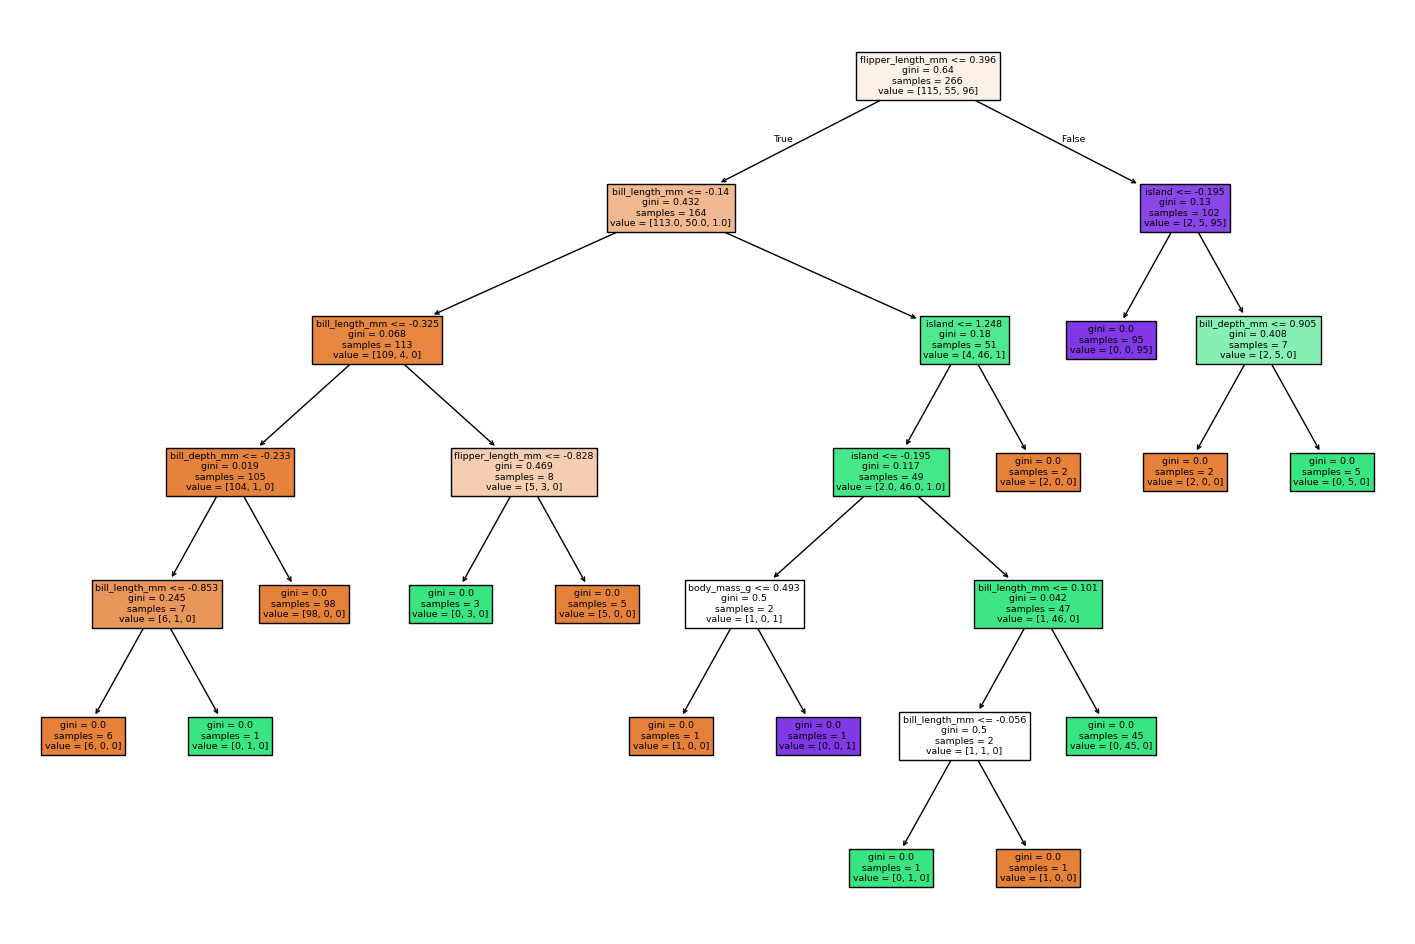

In [32]:
#decision tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)
#plot
fig, ax = plt.subplots(figsize=(18, 12))
tree.plot_tree(dt_classifier, feature_names=penguins.columns[1:], filled=True, ax=ax)
plt.show()

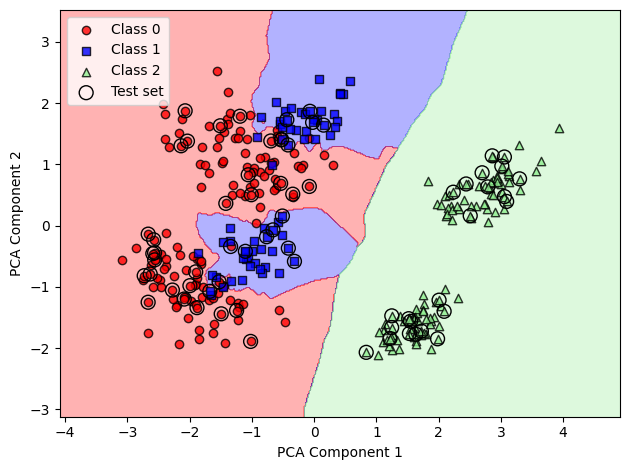

In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) #use pca to scale down to 2 dimensions
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

knn_classifier = KNeighborsClassifier(n_neighbors=3, p=2, metric='minkowski')
knn_classifier.fit(X_train_pca, y_train)
y_pred_knn = knn_classifier.predict(X_test_pca)

#plotting
X_combined_pca = np.vstack((X_train_pca, X_test_pca))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined_pca, y_combined, classifier=knn_classifier, test_idx=range(len(y_train), len(y_combined)))
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()